# Life Expectancy & GDP Data Analysis

In [1]:
# import libriaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 

In [2]:
# grab and render the dataframe
df = pd.read_csv('all_data.csv')
df.sample(10)

,Country,Year,Life expectancy at birth (years),GDP
2,Chile,2002,77.8,6.973681e+10
22,China,2006,74.2,2.752130e+12
40,Germany,2008,79.9,3.752370e+12
45,Germany,2013,80.6,3.752510e+12
81,Zimbabwe,2001,45.3,6.777385e+09
44,Germany,2012,80.6,3.543980e+12
1,Chile,2001,77.3,7.097992e+10
49,Mexico,2001,75.0,7.247040e+11
95,Zimbabwe,2015,60.7,1.630467e+10
16,China,2000,71.7,1.211350e+12


In [3]:
# renaming the Life Expectancy column for ease of use.
df = df.rename(columns={'Life expectancy at birth (years)':'Life_Exp'})
df.head()

,Country,Year,Life_Exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
# generate a summary statistics
df.describe(include='all')

,Country,Year,Life_Exp,GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [5]:
# check for unique values in Country
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

The collected data covers the life expectancy and GPD values for a period of 16 years, from 2000 to 2015, for a total a 6 countries, being Chile, China, Germany, Mexico, USA and Zimbabwe.

In [6]:
# generate statistics for each country
for i in range(df.Country.nunique()):
    print(f"Statistics for {df.Country.unique()[i]}:")
    # print(df[df.Country == df.Country.unique()[i]].describe())
    # generate the change in % of GDP and Life Exp between 2015 and 2000
    GDP_2015 = df[df.Country == df.Country.unique()[i]].GDP[df.Year == 2015].tolist()[0]
    GDP_2000 = df[df.Country == df.Country.unique()[i]].GDP[df.Year == 2000].tolist()[0]
    GDP_change = GDP_2015 / GDP_2000 - 1
    Life_Exp_2015 = df[df.Country == df.Country.unique()[i]].Life_Exp[df.Year == 2015].tolist()[0] 
    Life_Exp_2000 = df[df.Country == df.Country.unique()[i]].Life_Exp[df.Year == 2000].tolist()[0] 
    Life_Exp_change = Life_Exp_2015 / Life_Exp_2000 - 1
    print(f"GDP for {df.Country.unique()[i]} from 2000 to 2015 {'increased' if GDP_change > 0 else 'decreased'} by {(GDP_change * 100):.1f}%.") 
    print(f"Life Expecatncy for {df.Country.unique()[i]} from 2000 to 2015 {'increased' if Life_Exp_change > 0 else 'decreased'} by {(Life_Exp_change * 100):.1f}%.")
    if i != df.Country.nunique()-1:
        print('===========================')

Statistics for Chile:
GDP for Chile from 2000 to 2015 increased by 211.5%.
Life Expecatncy for Chile from 2000 to 2015 increased by 4.1%.
Statistics for China:
GDP for China from 2000 to 2015 increased by 813.4%.
Life Expecatncy for China from 2000 to 2015 increased by 6.1%.
Statistics for Germany:
GDP for Germany from 2000 to 2015 increased by 73.1%.
Life Expecatncy for Germany from 2000 to 2015 increased by 3.8%.
Statistics for Mexico:
GDP for Mexico from 2000 to 2015 increased by 68.5%.
Life Expecatncy for Mexico from 2000 to 2015 increased by 2.5%.
Statistics for United States of America:
GDP for United States of America from 2000 to 2015 increased by 75.7%.
Life Expecatncy for United States of America from 2000 to 2015 increased by 3.3%.
Statistics for Zimbabwe:
GDP for Zimbabwe from 2000 to 2015 increased by 143.7%.
Life Expecatncy for Zimbabwe from 2000 to 2015 increased by 32.0%.


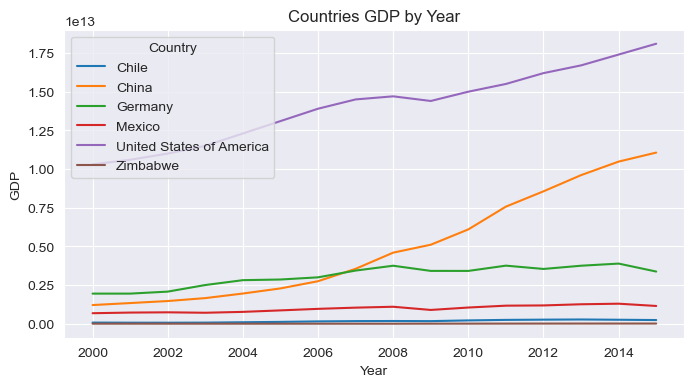

In [86]:
# plot countries gpd by year
plt.figure(figsize=(8,4)) 
sns.lineplot(x='Year', y='GDP', data=df, hue='Country')
plt.title("Countries GDP by Year");

Text(0.5, 1.0, 'Countries Life Expectancy by Year')

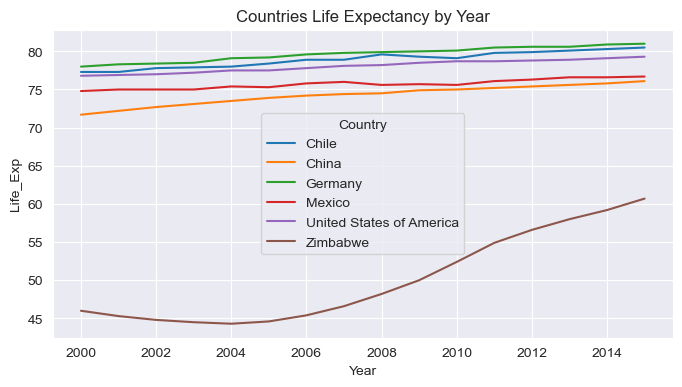

In [87]:
# plot life expectancy by year
plt.figure(figsize=(8,4)) 
sns.lineplot(x='Year', y='Life_Exp', data=df, hue='Country')
plt.title("Countries Life Expectancy by Year");


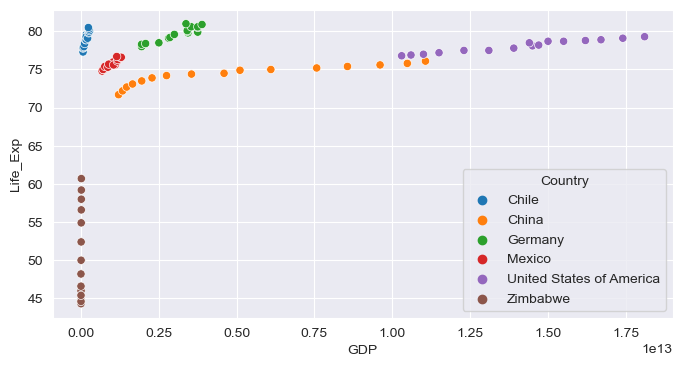

In [9]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='GDP', y='Life_Exp', data=df, hue='Country'); 

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life_Exp, dtype: float64


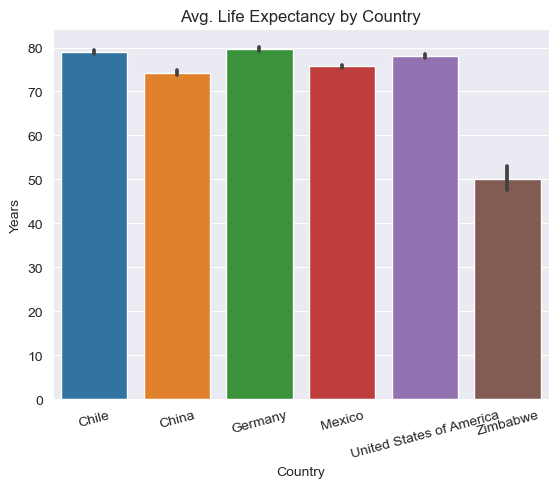

In [10]:
# generate and plot average life expetncy by country
print(df.groupby("Country").Life_Exp.mean())
pivot_tab = df.pivot(index='Year', columns="Country", values='Life_Exp')
sns.barplot(pivot_tab)
plt.title("Avg. Life Expectancy by Country")
plt.ylabel('Years')
plt.xticks(rotation=15); 


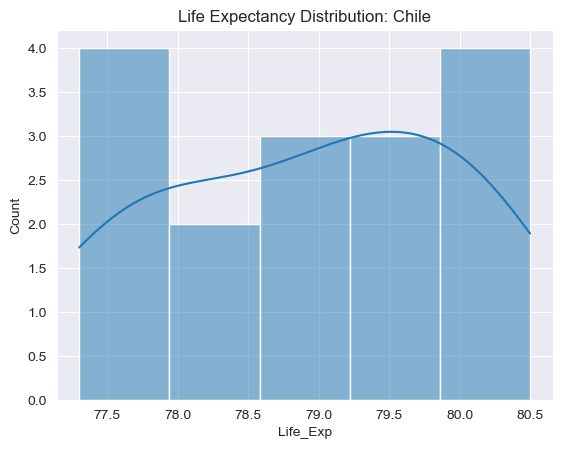

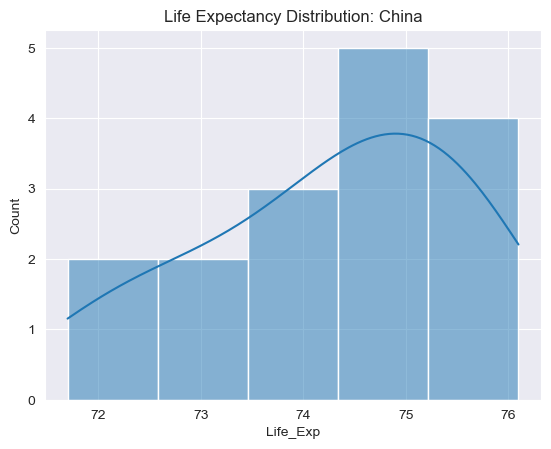

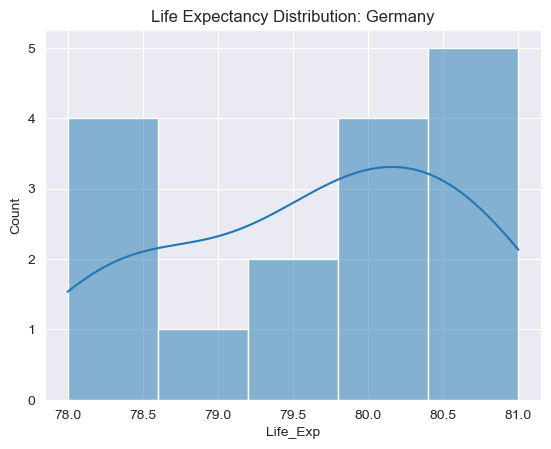

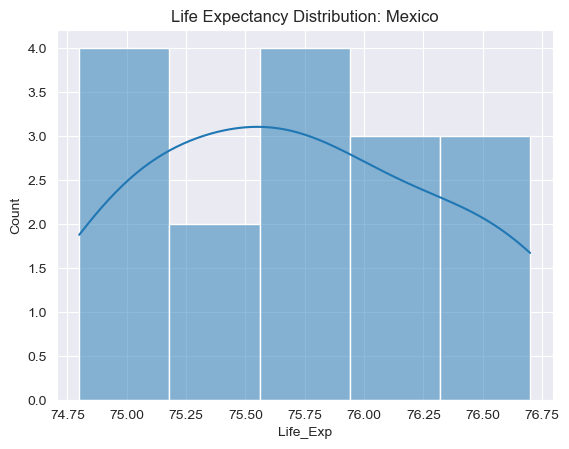

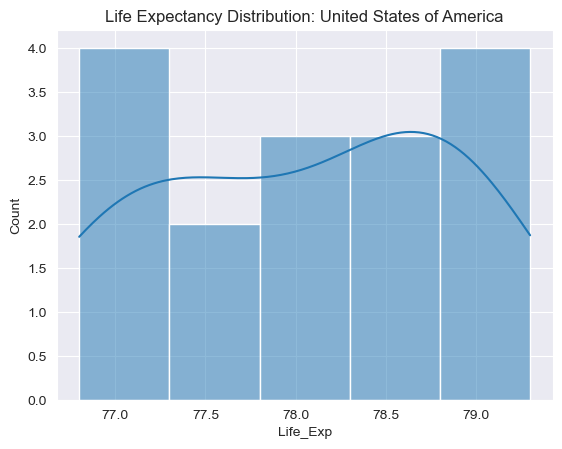

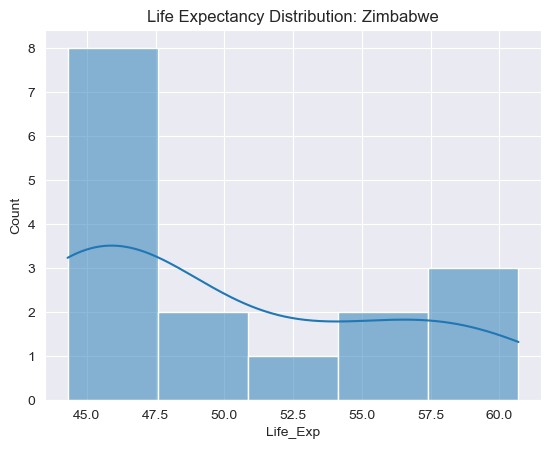

<Figure size 640x480 with 0 Axes>

In [88]:
# # plt.figure(figsize=(8,4))
for i in range(df.Country.nunique()):
    country = df.Country.unique()[i]
    plt.title(f"Life Expectancy Distribution: {country}")
    sns.histplot(x='Life_Exp', data=df[df.Country == country], kde=True); 
    plt.show()
    plt.clf(); 


In [73]:
# create yearly fluctution colummns for GDP and life Exp
df['GDP_Fluct'] = df.GDP.apply(lambda x: 0 if df.loc[df.GDP == x].index[0] in df.GDP[df.Year == 2000].index else (x/df.GDP[(df[df.GDP == x].index[0])-1]-1)*100)
df['Life_Exp_Fluct'] = df.Life_Exp.apply(lambda x: 0 if df.loc[df.Life_Exp == x].index[0] in df.Life_Exp[df.Year == 2000].index else (x/df.Life_Exp[(df[df.Life_Exp == x].index[0])-1]-1)*100)

df.head()

,Country,Year,Life_Exp,GDP,GDP_Fluct,Life_Exp_Fluct
0,Chile,2000,77.3,7.786093e+10,0.000000,0.000000
1,Chile,2001,77.3,7.097992e+10,-8.837562,0.000000
2,Chile,2002,77.8,6.973681e+10,-1.751358,0.646831
3,Chile,2003,77.9,7.564346e+10,8.469915,0.128535
4,Chile,2004,78.0,9.921039e+10,31.155282,0.128370


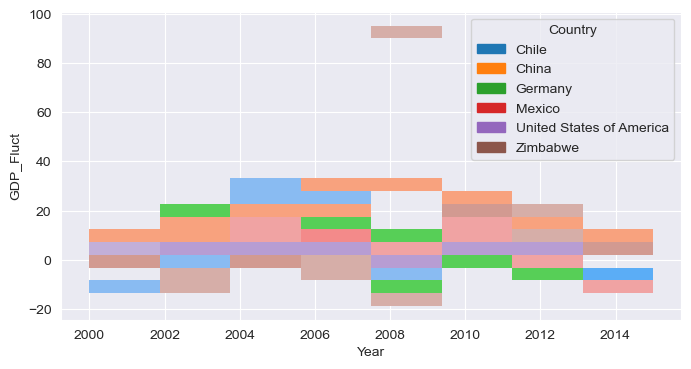

In [91]:
plt.figure(figsize=(8,4)) 
sns.histplot(data = df, x='Year', y='GDP_Fluct', hue='Country');
# plt.bar(df.Year, df.Life_Exp_Fluct, )